In [31]:
import pandas as pd

In [42]:
originalDF = pd.read_csv("../placement-decisions-different-costs/combined_placementDecisions_rl_los_cost_3_WR_nocap.csv")

In [43]:
# the datasets with all the different settings and the "cost" features
myDF = pd.read_csv("../placement-decisions-different-costs/combined_placementDecisions_rl_los_cost_3_WR_nocap.csv")
myDF['modified_jail'] = myDF['c_occu_jail']*myDF['ocp_jl_total']
myDF['modified_hd'] = myDF['c_occu_hd']*myDF['ocp_hd_total']
myDF['modified_wr'] = myDF['c_occu_wr']*myDF['ocp_wr_total']
myDF.drop(['ocp_jl_total', 'ocp_hd_total', 'ocp_wr_total', 'c_occu_wr', 'c_occu_hd', 'c_occu_jail','ocp_jl_low_los', 'ocp_wr_low_los','ocp_hd_low_los','need'], axis = 1, inplace = True)

In [44]:
print(originalDF['c_occu_jail'].value_counts())
print(originalDF['c_occu_hd'].value_counts())
print(originalDF['c_occu_wr'].value_counts())

c_occu_jail
0.00144    52992
0.00009    52408
Name: count, dtype: int64
c_occu_hd
0.000432    26620
0.000144    26372
0.000009    26310
0.000027    26098
Name: count, dtype: int64
c_occu_wr
0.000432    26620
0.001152    26372
0.000072    26310
0.000027    26098
Name: count, dtype: int64


In [45]:
# one hot encoding  -> the target is "placement", so we don't need to encode this column, also bcz RandomForest can handle categorical target data
# work release = 0 | home detention = 1 | jail = 2
for ind, item in myDF.iterrows():
    if item['placement'] == 'work release':
        myDF['placement'].iat[ind] = '0'
    elif item['placement'] == 'home detention':
        myDF['placement'].iat[ind] = '1'
    elif item['placement'] == 'jail':
        myDF['placement'].iat[ind] = '2'

#object to int
myDF['placement'] = pd.to_numeric(myDF['placement'])

In [46]:
y = myDF['placement']
X = myDF.drop(['placement'], axis = 1)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, random_state = 50)

In [47]:
trained_rf = RandomForestClassifier(max_depth= None, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 4, n_estimators= 230)
trained_rf.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=230)

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, trained_rf.predict_proba(X_test), multi_class='ovr' )

0.9927860797499389

In [49]:
from sklearn.metrics import f1_score
y_pred = trained_rf.predict(X_test)
print('f1_score: ' + str(f1_score(y_test, y_pred, average='weighted')))

f1_score: 0.9424987165224161


In [39]:
## SHAP library

In [40]:
import shap

c:\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
import shap
explainer = shap.TreeExplainer(trained_rf)
shap_values = explainer(X_train)

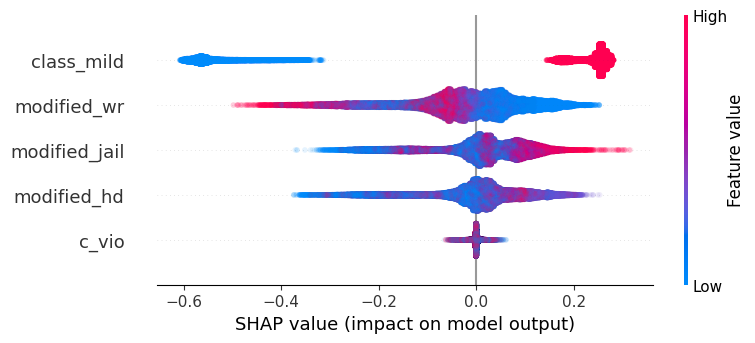

In [55]:
shap.plots.beeswarm(shap_values[:,:,0], alpha = 0.1) # work release , nocap

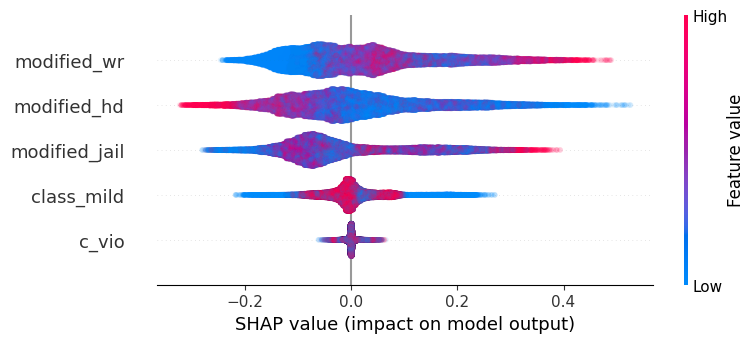

In [56]:
shap.plots.beeswarm(shap_values[:,:,1], alpha = 0.1) #Home Detention, nocap

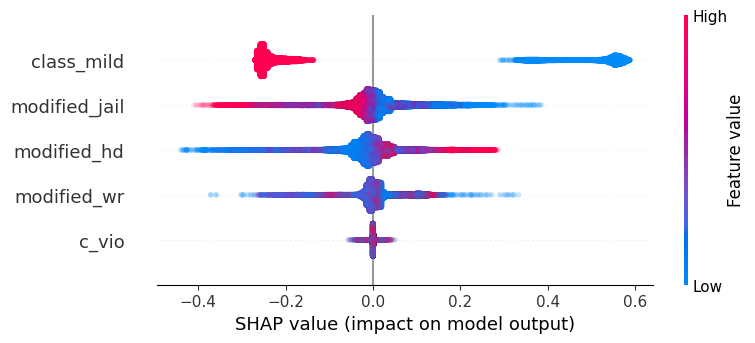

In [57]:
shap.plots.beeswarm(shap_values[:,:,2], alpha = 0.1) # Jail, nocap